In [1]:
models = {
    "OpenAI ChatGPT": "openai",
    "Google Gemini": "gemini",
    "Anthropic Claude": "anthropic"
}

list(models.keys())[0]

'OpenAI ChatGPT'

In [2]:
# Research team member
members = ["economy", "politics", "social", "culture", "technology", "science", "general"]
names = ["John", "Machiavelli", "Marx", "Rose", "Elon", "Newton", "Rick"]

# Dictionary to store agents dynamically
research_members = {}

for member, name in zip(members, names):
    research_members[member] = name
    
research_members

{'economy': 'John',
 'politics': 'Machiavelli',
 'social': 'Marx',
 'culture': 'Rose',
 'technology': 'Elon',
 'science': 'Newton',
 'general': 'Rick'}

In [3]:
from langgraph.graph import END
research_members.update({"FINISH": END})
research_members

{'economy': 'John',
 'politics': 'Machiavelli',
 'social': 'Marx',
 'culture': 'Rose',
 'technology': 'Elon',
 'science': 'Newton',
 'general': 'Rick',
 'FINISH': '__end__'}

In [4]:
from typing import TypedDict, List, Annotated

from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import JsonOutputParser
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI

import keyring

from state import FactCheckState
from tools import set_model, search
from researcher import Researcher
from tools import display_graph, invoke_graph, stream_graph

llm = ChatOpenAI(model='gpt-4o-mini', api_key=keyring.get_password('openai', 'key_for_mac'))

/Users/woojin/Documents/github/projects/fact_checker/factchecker/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


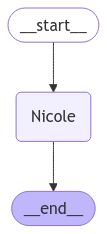

In [5]:
from analyzer import Analyzer

analyzer = Analyzer(llm)
analysis_graph = analyzer.create_graph()
display_graph(analysis_graph)

In [6]:
articles = """ 
10년 전 혜성처럼 등장해 핀테크 업계 공룡으로 성장한 ‘토스’가 1조원 이상의 천문학적인 누적 적자에 직면했다. 핀테크 혁신에 대한 기대감을 모으며 정부로부터 각종 인허가를 얻어냈지만 사업 확장 과정에서 기성 업체보다 훨씬 비싼 수수료를 책정하며 손실금 회수에 열중하고 있다. 내부에서는 계열사 사이 경쟁 구도가 갈등으로 이어지며 ‘팀킬’ 논란까지 일고 있다. 토스가 목표로 하는 연내 미국 상장도 쉽지 않다는 분석이다.

‘금융을 쉽고 간편하게’ 슬로건을 내세우며 2013년 설립된 비바리퍼블리카는 2015년 간편송금 앱 토스를 출시하며 혁신 아이콘으로 각광받았다. 앱 하나로 시작된 이 회사는 현재 자회사 18개를 거느리고 있다. 계열사 면면을 보면 은행(토스뱅크) 증권(토스증권) 보험(토스인슈어런스) 이동통신(토스모바일) 등 다양한 분야에 발을 걸쳤다.



지난 10년간 공격적인 외형 확장은 천문학적인 손실로 이어졌다. 2015년 앱을 출시하며 핀테크 시장에 뛰어든 뒤 2016년부터 2024년 3분기까지 누적으로 1조1233억원의 순손실을 냈다. 2018년까지만 해도 500억원 미만이었던 연간 순손실이 2021년 2000억원, 2022년엔 3000억원을 넘어섰다.



토스는 편리한 유저인터페이스(UI)를 구현하며 네이버페이·카카오페이와 어깨를 견주는 핀테크 공룡으로 성장했지만 이런 성공 신화는 소비자가 치러야 할 비싼 비용으로 돌아왔다. 각 증권사가 해외주식 거래 고객들에게 실질적으로 부과하는 ‘우대 수수료율’를 보면 토스증권은 0.10%로 KB증권과 함께 가장 높은 축에 속한다.

소비자 편익 증진과 금융 혁신을 명분으로 얻어낸 은행업 라이선스도 비싼 대출 상품 판매에 활용되고 있다. 전국은행연합회가 공시하는 주요 은행 예대금리차 자료를 보면 지난해 말 기준 토스뱅크의 평균 대출금리는 연 5.89%로 5개 시중은행(KB국민·신한·우리·하나·NH농협은행)과 3개 인터넷전문은행(카카오뱅크·케이뱅크·토스뱅크) 가운데 압도적인 1위다. 5%대 대출금리를 기록한 은행은 토스뱅크뿐이다.

같은 기간 수신(예·적금)과 여신(대출) 금리 사이 격차를 측정하는 예대금리차도 토스뱅크가 2.88%포인트로 가장 높았다. 광주은행을 제외하면 제1금융권 모든 은행의 예대금리차가 1%포인트대다. 특히 경쟁사인 케이뱅크·카카오뱅크는 지난해 하반기부터 예대금리차를 점차 줄여나갔지만, 토스뱅크는 유일하게 예대금리차를 확대했다. 한마디로 상품(자금)을 싸게 들여와 가격(대출금리)을 높여 비싸게 팔고 있다는 뜻이다.

외형이 급속도로 팽창하면서 스타트업 특유의 유연한 조직 문화는 사라지고 내부 갈등은 커지고 있다. 최근에는 외부 출신 한 계열사 대표가 호실적에도 불구하고 갑작스럽게 교체됐다. 이 계열사 관계자는 “전 대표가 계열사 대표 평가에서 1등을 기록하는 등 내부 평가가 좋았음에도 임기를 마치지 못했다”며 “후임 대표로 창업자 이승건 대표의 측근으로 불리는 비전문가가 부임하면서 ‘총독’이 왔다는 내부 반발이 있었다”고 전했다.



주도권을 쥐기 위한 계열사 사이 자중지란이 벌어지기도 한다. 특히 지주사 격인 비바리퍼블리카 핵심 계열사인 토스뱅크와 토스증권은 서로의 사업 영역을 침범하는 정책을 연이어 내놓으며 충돌하고 있다. 토스뱅크는 지난해 초 외화 환전 수수료를 무료로 제공하는 ‘외화 통장’을 토스증권과 사전 논의없이 출시했다. 환전 수수료는 2023년 기준 17조원을 넘어설 정도로 증권사 입장에서 효자 상품이다. 증권사 수입의 상당 부분을 차지하는 환전 수수료를 같은 계열사인 토스뱅크에서 무료로 풀어버린 셈이다.

토스뱅크로부터 뒤통수를 맞은 토스증권은 같은 해 12월 해외주식 거래 고객이 외화를 직접 입금할 수 있는 ‘달러 송금’ 기능을 도입하면서도 토스뱅크 외화 통장은 배제했다. 다른 은행 고객들은 외화를 원화로 환전해 토스증권에 보낸 다음 다시 외화로 환전하는 번거로운 작업을 거칠 필요가 없지만, 토스뱅크 외화 통장 이용자는 이런 혜택 범주에서 제외됐다. 형제 격인 토스뱅크보다 다른 은행과의 거래가 더 자유로운 아이러니한 상황이 연출된 셈이다. 토스 계열사에 몸담았던 한 인사는 “서로 투명하게 정보를 공유하던 문화가 점차 사라지고 있다”며 “다른 계열사에 영향을 미칠 만한 서비스도 출시 직전까지 보안을 유지하는 분위기”라고 설명했다.

그룹 내에서 ‘돈이 되는’ 자회사와 그렇지 못한 곳 사이 눈에 보이지 않는 갈등도 점화되고 있다. 또 다른 토스 관계자는 “성과급 규모가 발표될 때마다 흑자 계열사인 토스뱅크·토스증권과 적자 계열사인 토스페이먼츠·토스플레이스 간 신경전이 벌어진다”고 말했다.

상황이 이렇다 보니 비바리퍼블리카가 목표로 하는 미국 나스닥 상장에도 빨간불이 켜졌다. 투자은행(IB) 업계에서 비바리퍼블리카는 9조원 안팎의 기업가치를 인정받고 있지만 거대한 체급에 맞는 중·장기적인 수익원은 아직 보이지 않고 있다는 게 중론이다. 앞서 쿠팡(2021년)과 네이버웹툰(2024년)도 각각 뉴욕증권거래소(NYSE)와 나스닥에 상장했지만 수익성에 대한 우려가 제기되며 주가가 공모가 대비 절반 아래로 추락한 바 있다. 국내에서는 토스뱅크 경쟁사인 케이뱅크가 지난해 코스피 상장을 준비했지만 수요 예측 단계에서 흥행에 실패하며 고배를 마셨다.

증권업계 관계자는 “막대한 손실과 내부 갈등이 지속되는 상황에서 성장 기대감만으로 상장을 추진하기까지는 어려움이 많을 것”이라고 말했다.

"""

In [7]:
stream_graph(analysis_graph, articles)

AI: {
    "contentious_issues": [
        "토스가 1조원 이상의 누적 적자에 직면해 있다는 주장에 대한 사실 확인 필요",
        "토스가 기성 업체보다 비싼 수수료를 책정하고 있다는 것의 정확성 검토",
        "토스의 평균 대출금리가 5.89%로 가장 높다는 주장에 대한 증거 필요",
        "토스의 영업 정책이 다른 계열사와 충돌하며 내부 갈등을 초래하고 있다는 주장 확인",
        "비바리퍼블리카의 미국 나스닥 상장 목표의 실현 가능성에 대한 분석 필요",
        "투자은행에서 토스의 기업가치가 9조원으로 평가받고 있다는 정보의 신뢰성 검토"
    ]
}


/Users/woojin/Documents/github/projects/fact_checker/research_team.py:119: LangChainDeprecationWarning: The method `BaseChatOpenAI.bind_functions` was deprecated in langchain-openai 0.2.1 and will be removed in 1.0.0. Use :meth:`~langchain_openai.chat_models.base.ChatOpenAI.bind_tools` instead.
  | self.llm.bind_functions(functions=[function_def], function_call="route")


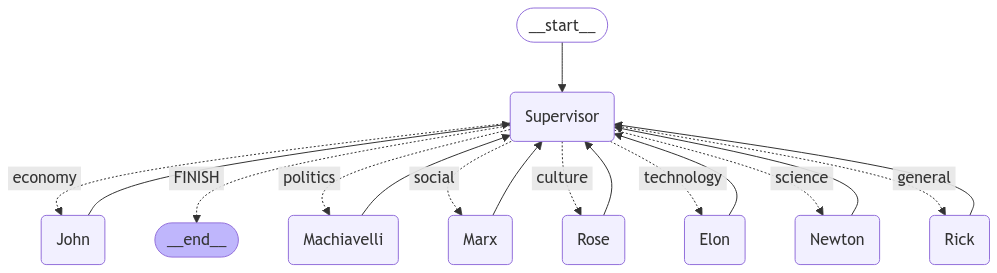

In [8]:
from research_team import ResearchTeam

research = ResearchTeam(llm)
research_graph = research.create_graph()
display_graph(research_graph)

In [9]:
contentious_issues = [
    "토스가 지난 10년 동안 1조원 이상의 누적 적자에 직면했다는 주장.",
    "토스의 수수료가 기성 업체들보다 훨씬 비쌌다는 점.",
    "토스뱅크의 평균 대출금리가 5.89%로 압도적으로 높다는 주장.",
    "토스뱅크와 토스증권 간의 갈등과 '팀킬' 논란.",
    "비바리퍼블리카의 미국 나스닥 상장이 어려울 것이라는 분석.",
    "외화 환전 수수료 관련 토스뱅크의 정책과 토스증권의 반발.",
    "상장 추진에 있어 내부 갈등과 막대한 손실이 걸림돌이 될 것이라는 주장."
]

In [10]:
stream_graph(research_graph, contentious_issues[0])

AI: 토스가 지난 10년 동안 1조원 이상의 누적 적자에 직면했다는 주장은 사실입니다. 여러 신뢰할 수 있는 출처에 따르면, 비바리퍼블리카(토스)는 2015년 앱 출시 이후부터 2024년 3분기까지 누적 순손실이 1조원 이상에 달하며, 최근 2023년 3분기 기준으로 누적 적자가 1조 2783억원에 이른다고 보고되었습니다. 

### **평가: 100/100**
- **이유:** 토스는 지난 10년간 지속적으로 적자를 기록해 왔으며, 이는 여러 경영 보고서 및 뉴스 아티클에서 확인된 사실입니다.

### **지원 증거:**
- [신뢰할 수 있는 뉴스 출처](https://www.newstomato.com/ReadNews.aspx?no=1215360)에서 2023년 3분기 기준 누적 적자가 1조 2783억 원에 달한다는 내용을 언급하고 있습니다.
- 또 다른 출처에서는 2015년부터 2024년 3분기까지 누적 순손실이 1조 1233억원에 이른다고 보도하고 있습니다(출처: [이 기사를 참조하세요](https://v.daum.net/v/20250209190416137)).

따라서, "토스가 지난 10년 동안 1조원 이상의 누적 적자에 직면했다"는 주장은 사실이며, 100점으로 평가합니다.
